In [1]:
import csv
returns = []
lens = []
times = []
with open('TrainLog.monitor.csv', mode='r') as csvfile:
    next(csvfile)
    reader = csv.DictReader(csvfile)
    for row in reader:
        returns.append(float(row['r']))
        lens.append(float(row['l']))
        times.append(float(row['t']))

print(len(returns))

2384


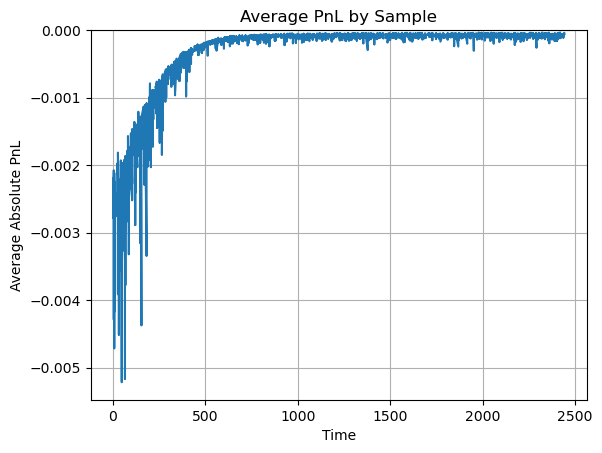

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(times,[returnk / (251*5) for returnk in returns])
plt.title("Average PnL by Sample -0.7 Corr")
#plt.xlim([0,3e6])
lwr = plt.ylim()[0]
plt.ylim([lwr,0])
plt.grid()
plt.ylabel('Average Absolute PnL')
plt.xlabel('Time')
plt.show()

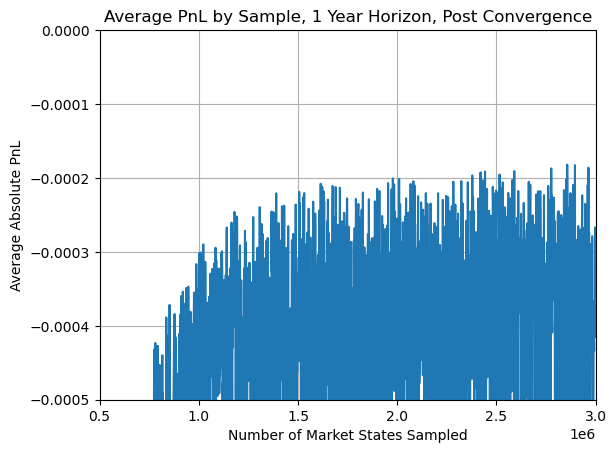

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(lens),[returnk / 251 for returnk in returns])
plt.title("Average PnL by Sample, 1 Year Horizon, Post Convergence")
plt.xlim([0.5e6,3e6])
lwr = plt.ylim()[0]
plt.ylim([-0.0005,0])
plt.grid()
plt.ylabel('Average Absolute PnL')
plt.xlabel('Number of Market States Sampled')
plt.show()